In [1]:

import networkx as nx
import matplotlib.pyplot as plt
from matplotlib.animation import FuncAnimation
import random
import time
import tracemalloc
import pandas as pd
import numpy as np
from networkx.algorithms.tree import minimum_spanning_tree

In [2]:
# Set the default color palette with yellow tones
yellow_colors = {
    'background': '#FFFEF2',
    'node_default': '#FFF4A3',
    'node_visited': '#FFD700',
    'node_current': '#FFA500',
    'edge_default': '#CCCCCC',
    'edge_mst': '#FFD700',
    'edge_candidate': '#FFAA00',
    'edge_current': '#FF8C00',
    'edge_rejected': '#FF4500',
    'unsorted': '#FFCC66'
}

# Configure plot style
plt.style.use('seaborn-v0_8-whitegrid')
plt.rcParams['figure.facecolor'] = yellow_colors['background']
plt.rcParams['axes.facecolor'] = yellow_colors['background']

### Prim's Algorithm 

Prim’s algorithm builds a **Minimum Spanning Tree (MST)** using a **greedy approach**.

**Steps:**
1. Start with any random vertex.
2. Add the **smallest edge** that connects the tree to a **new vertex**.
3. Repeat step 2 until all vertices are included.

It always picks the **lowest-weight edge** that expands the tree without forming a cycle.


In [3]:



def prim(graph, start):
    
    visited = set()
    mst = []
    edges = []

    visited.add(start)

    # Add all edges from the starting vertex
    for dest, weight in graph[start].items():
        edges.append((start, dest, weight))

    while edges:
        # Find the edge with minimum weight
        min_edge = None
        for edge in edges:
            if min_edge is None or edge[2] < min_edge[2]:
                min_edge = edge
        edges.remove(min_edge)

        src, dest, weight = min_edge

        # Skip if destination already visited (prevents cycles)
        if dest in visited:
            continue

        # Add edge to MST and mark destination as visited
        mst.append((src, dest, weight))
        visited.add(dest)

        # Add all edges from the new vertex
        for next_dest, next_weight in graph[dest].items():
            if next_dest not in visited:
                edges.append((dest, next_dest, next_weight))

    return mst

optimed version:

In [4]:
def prim_optimized(graph, start):
    """
    Optimized implementation of Prim's algorithm that uses sorting
    to efficiently find the minimum weight edge.
    
    Args:
        graph: Dictionary representation of graph
        start: Starting vertex
        
    Returns:
        List of edges in the minimum spanning tree
    """
    visited = set([start])
    edges = []
    mst = []

    # Add initial edges and sort them by weight
    for dest, weight in graph[start].items():
        edges.append((weight, start, dest))
    edges.sort()
    
    while edges:
        weight, src, dest = edges.pop(0)  # Take the edge with minimum weight

        if dest in visited:
            continue

        mst.append((src, dest, weight))
        visited.add(dest)

        # Add new edges from the newly added vertex
        for next_dest, next_weight in graph[dest].items():
            if next_dest not in visited:
                edges.append((next_weight, dest, next_dest))

        # Re-sort after adding new edges
        edges.sort()

    return mst


### Kruskal's Algorithm 

Kruskal’s algorithm builds a **Minimum Spanning Tree (MST)** using a **greedy approach**.

**Steps:**
1. Sort all edges by weight (from lowest to highest).
2. Add the **smallest edge** that **doesn't form a cycle**.
3. Repeat until all vertices are connected.

It always picks the next lightest edge that connects two different trees.


In [5]:
def find(parent, node):
    while parent[node] != node:
        node = parent[node]
    return node

def union_naive(parent, rank, node1, node2):
    root1 = find(parent, node1)
    root2 = find(parent, node2)
    parent[root2] = root1

def kruskal(graph):
   
    edges = []
    # Collect all edges from the graph
    for node in graph:
        for neighbor, weight in graph[node].items():
            edges.append((weight, node, neighbor))

    mst = []
    # Initialize disjoint set for union-find
    parent = {node: node for node in graph}
    rank = {node: 0 for node in graph}

    while edges:
        # Find minimum weight edge
        min_edge = None
        for edge in edges:
            if min_edge is None or edge[0] < min_edge[0]:
                min_edge = edge
        edges.remove(min_edge)

        weight, node1, node2 = min_edge

        # Check if adding the edge creates a cycle
        if find(parent, node1) != find(parent, node2):
            union_naive(parent, rank, node1, node2)
            mst.append((node1, node2, weight))

    return mst

optimized version


In [6]:
def find_optimized(parent, node):
    """Find with path compression for better efficiency"""
    if parent[node] != node:
        parent[node] = find_optimized(parent, parent[node])
    return parent[node]

def union_optimized(parent, rank, node1, node2):
    """Union by rank for better efficiency"""
    root1 = find_optimized(parent, node1)
    root2 = find_optimized(parent, node2)

    if root1 != root2:
        if rank[root1] > rank[root2]:
            parent[root2] = root1
        elif rank[root1] < rank[root2]:
            parent[root1] = root2
        else:
            parent[root2] = root1
            rank[root1] += 1

def kruskal_optimized(graph):
    edges = []
    for node in graph:
        for neighbor, weight in graph[node].items():
            edges.append((weight, node, neighbor))

    # Sort edges once at the beginning
    edges.sort()

    parent = {node: node for node in graph}
    rank = {node: 0 for node in graph}
    mst = []

    for weight, node1, node2 in edges:
        if find_optimized(parent, node1) != find_optimized(parent, node2):
            union_optimized(parent, rank, node1, node2)
            mst.append((node1, node2, weight))

    return mst


### Testing Algorithms

In [7]:
test_graph = {
    '0': {'1': 1, '2': 2},
    '1': {'0': 1, '3': 3, '4': 4},
    '2': {'0': 2},
    '3': {'1': 3},
    '4': {'1': 4, '2': 5}
}

# Test Prim's algorithm
prim_mst = prim(test_graph, '0')
print("Prim's Algorithm Result:")
for src, dest, weight in prim_mst:
    print(f"Edge: {src} - {dest}, Weight: {weight}")

# Test optimized Prim's algorithm
prim_opt_mst = prim_optimized(test_graph, '0')
print("\nOptimized Prim's Algorithm Result:")
for src, dest, weight in prim_opt_mst:
    print(f"Edge: {src} - {dest}, Weight: {weight}")

# Test Kruskal's algorithm
kruskal_mst = kruskal(test_graph)
print("\nKruskal's Algorithm Result:")
for src, dest, weight in kruskal_mst:
    print(f"Edge: {src} - {dest}, Weight: {weight}")

# Test optimized Kruskal's algorithm
kruskal_opt_mst = kruskal_optimized(test_graph)
print("\nOptimized Kruskal's Algorithm Result:")
for src, dest, weight in kruskal_opt_mst:
    print(f"Edge: {src} - {dest}, Weight: {weight}")

Prim's Algorithm Result:
Edge: 0 - 1, Weight: 1
Edge: 0 - 2, Weight: 2
Edge: 1 - 3, Weight: 3
Edge: 1 - 4, Weight: 4

Optimized Prim's Algorithm Result:
Edge: 0 - 1, Weight: 1
Edge: 0 - 2, Weight: 2
Edge: 1 - 3, Weight: 3
Edge: 1 - 4, Weight: 4

Kruskal's Algorithm Result:
Edge: 0 - 1, Weight: 1
Edge: 0 - 2, Weight: 2
Edge: 1 - 3, Weight: 3
Edge: 1 - 4, Weight: 4

Optimized Kruskal's Algorithm Result:
Edge: 0 - 1, Weight: 1
Edge: 0 - 2, Weight: 2
Edge: 1 - 3, Weight: 3
Edge: 1 - 4, Weight: 4


# ## 5. Visualization: Prim's Algorithm Step-by-Step

/tmp/ipykernel_73327/1876315171.py:269: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  plt.tight_layout()


<Figure size 1200x800 with 0 Axes>

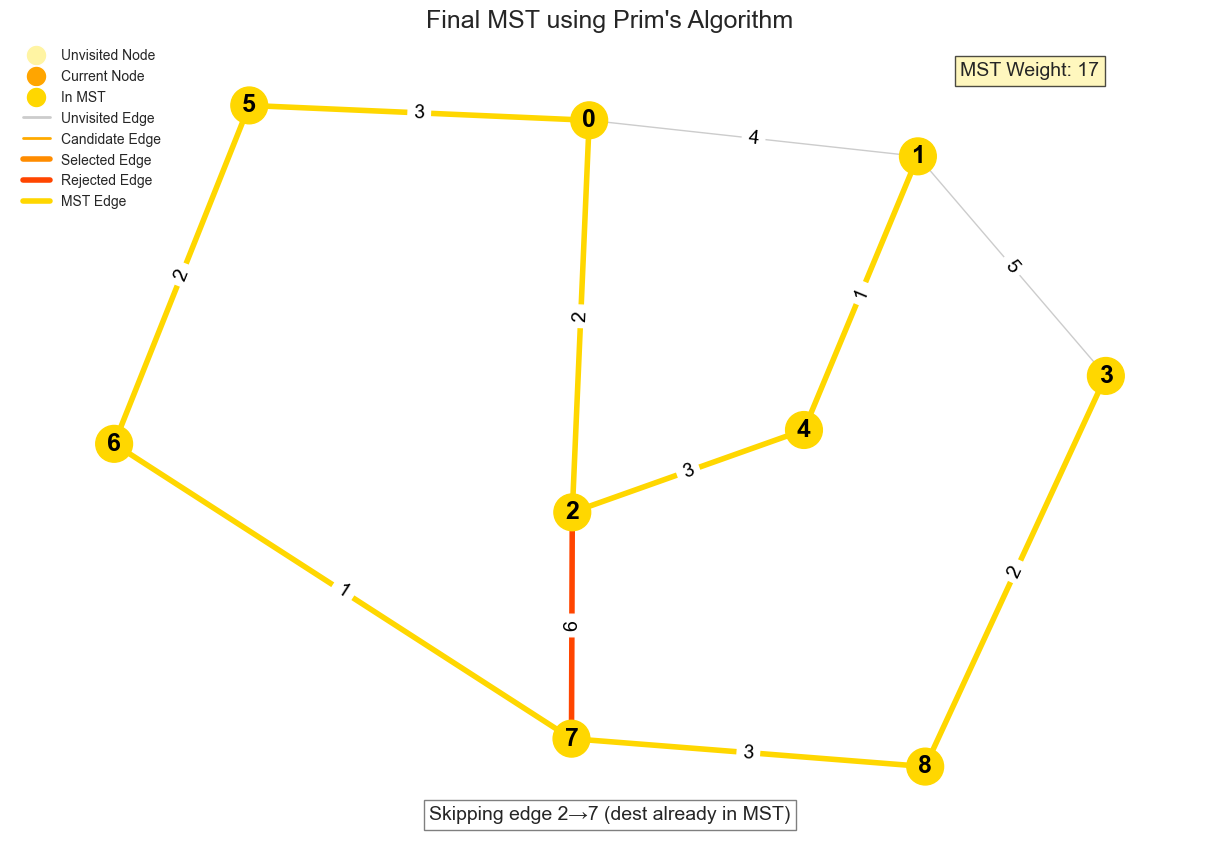

In [8]:
def prim_optimized_with_steps(graph, start):
  
    visited = set([start])
    edges = []
    mst = []
    steps = []

    # Initial state
    steps.append({
        'event': 'initialize',
        'node': start,
        'visited': visited.copy(),
        'mst': mst.copy(),
        'current_edges': [],
        'all_edges': []
    })

    # Add initial edges
    initial_edges = []
    for dest, weight in graph[start].items():
        initial_edges.append((weight, start, dest))

    steps.append({
        'event': 'add_edges',
        'node': start,
        'visited': visited.copy(),
        'mst': mst.copy(),
        'current_edges': [],
        'all_edges': initial_edges.copy(),
        'unsorted': True
    })

    # Sort edges
    initial_edges.sort()
    edges = initial_edges.copy()

    steps.append({
        'event': 'sort_edges',
        'visited': visited.copy(),
        'mst': mst.copy(),
        'current_edges': [],
        'all_edges': edges.copy()
    })

    while edges:
        # Select the edge with minimum weight
        weight, src, dest = edges[0]
        current_edges = [(src, dest, weight)]

        steps.append({
            'event': 'select_edge',
            'visited': visited.copy(),
            'mst': mst.copy(),
            'current_edges': current_edges,
            'all_edges': edges.copy()
        })

        edges.pop(0)

        # Skip if destination already visited
        if dest in visited:
            steps.append({
                'event': 'skip_edge',
                'visited': visited.copy(),
                'mst': mst.copy(),
                'current_edges': current_edges,
                'all_edges': edges.copy()
            })
            continue

        # Add edge to MST
        mst.append((src, dest, weight))
        visited.add(dest)

        steps.append({
            'event': 'add_to_mst',
            'node': dest,
            'visited': visited.copy(),
            'mst': mst.copy(),
            'current_edges': current_edges,
            'all_edges': edges.copy()
        })

        # Add new edges
        new_edges = []
        for next_dest, next_weight in graph[dest].items():
            if next_dest not in visited:
                new_edge = (next_weight, dest, next_dest)
                edges.append(new_edge)
                new_edges.append((dest, next_dest, next_weight))

        if new_edges:
            steps.append({
                'event': 'add_edges',
                'node': dest,
                'visited': visited.copy(),
                'mst': mst.copy(),
                'current_edges': new_edges,
                'all_edges': edges.copy(),
                'unsorted': True
            })

            edges.sort()

            steps.append({
                'event': 'sort_edges',
                'visited': visited.copy(),
                'mst': mst.copy(),
                'current_edges': [],
                'all_edges': edges.copy()
            })

    return steps

# Define a slightly larger graph for visualization
visualization_graph = {
    '0': {'1': 4, '2': 2, '5': 3},
    '1': {'0': 4, '3': 5, '4': 1},
    '2': {'0': 2, '4': 3, '7': 6},
    '3': {'1': 5, '8': 2},
    '4': {'1': 1, '2': 3},
    '5': {'0': 3, '6': 2},
    '6': {'5': 2, '7': 1},
    '7': {'2': 6, '6': 1, '8': 3},
    '8': {'3': 2, '7': 3}
}

# Create a NetworkX graph
G_prim = nx.Graph()
for node, neighbors in visualization_graph.items():
    for neighbor, weight in neighbors.items():
        G_prim.add_edge(node, neighbor, weight=weight)

# Get the steps
prim_steps = prim_optimized_with_steps(visualization_graph, '0')

# Define colors based on yellow theme
node_colors = {
    'unvisited': yellow_colors['node_default'],
    'visited': yellow_colors['node_visited'],  
    'current': yellow_colors['node_current']
}

edge_colors = {
    'unvisited': yellow_colors['edge_default'],
    'mst': yellow_colors['edge_mst'],
    'candidate': yellow_colors['edge_candidate'],
    'current': yellow_colors['edge_current'],
    'rejected': yellow_colors['edge_rejected'],
    'unsorted': yellow_colors['unsorted']
}

# Visualization function
def update_prim(frame):
    plt.clf()
    step = prim_steps[frame]
    event = step['event']
    visited_nodes = step['visited']
    mst_edges = step['mst']
    current_edges = step['current_edges']
    unsorted = step.get('unsorted', False)
    
    # Fixed layout for consistent visualization
    pos = nx.spring_layout(G_prim, seed=42)
    
    # Color nodes
    node_color_map = []
    for node in G_prim.nodes():
        if event in ['add_to_mst', 'add_edges'] and 'node' in step and node == step['node']:
            node_color_map.append(node_colors['current'])
        elif node in visited_nodes:
            node_color_map.append(node_colors['visited'])
        else:
            node_color_map.append(node_colors['unvisited'])
    
    # Color edges
    edge_color_map = []
    edge_width_map = []
    
    for u, v in G_prim.edges():
        edge = None
        for src, dest, _ in mst_edges:
            if (u == src and v == dest) or (u == dest and v == src):
                edge = 'mst'
                break
        
        if edge != 'mst':
            for src, dest, _ in current_edges:
                if (u == src and v == dest) or (u == dest and v == src):
                    if event == 'skip_edge':
                        edge = 'rejected'
                    else:
                        edge = 'current'
                    break
            
            if edge is None:
                for weight, src, dest in step['all_edges']:
                    if (u == src and v == dest) or (u == dest and v == src):
                        edge = 'unsorted' if unsorted else 'candidate'
                        break
        
        if edge is None:
            edge = 'unvisited'
        
        edge_color_map.append(edge_colors[edge])
        edge_width_map.append(4 if edge in ['mst', 'current', 'rejected'] else 1)
    
    # Draw graph
    nx.draw(G_prim, pos, with_labels=True, node_color=node_color_map,
            edge_color=edge_color_map, width=edge_width_map,
            node_size=700, font_size=18, font_weight='bold')
    
    # Add edge labels
    edge_labels = nx.get_edge_attributes(G_prim, 'weight')
    nx.draw_networkx_edge_labels(G_prim, pos, edge_labels=edge_labels, font_size=14)
    
    plt.title(f"Prim's Algorithm - Step {frame+1}/{len(prim_steps)}", fontsize=16)
    
    # Add description
    if event == 'initialize':
        description = f"Starting with node: {step['node']}"
    elif event == 'add_edges':
        description = f"Adding edges from node {step['node']} to candidate list"
    elif event == 'sort_edges':
        description = "Sorting edges by weight"
    elif event == 'select_edge':
        src, dest, weight = current_edges[0]
        description = f"Selected minimum weight edge: {src}→{dest} (weight: {weight})"
    elif event == 'skip_edge':
        src, dest, weight = current_edges[0]
        description = f"Skipping edge {src}→{dest} (dest already in MST)"
    elif event == 'add_to_mst':
        edge = current_edges[0]
        description = f"Adding edge {edge[0]}→{edge[1]} (weight: {edge[2]}) to MST"
    
    plt.figtext(0.5, 0.02, description,
                ha="center", fontsize=14, bbox={"facecolor": "white", "alpha": 0.5})
    
    # Add MST weight info
    total_weight = sum(weight for _, _, weight in mst_edges)
    plt.figtext(0.85, 0.95, f"MST Weight: {total_weight}",
                ha="center", fontsize=14, bbox={"facecolor": yellow_colors['node_default'], "alpha": 0.7})
    
    # Add legend
    legend_elements = [
        plt.Line2D([0], [0], marker='o', color='w', markerfacecolor=node_colors['unvisited'], markersize=15, label='Unvisited Node'),
        plt.Line2D([0], [0], marker='o', color='w', markerfacecolor=node_colors['current'], markersize=15, label='Current Node'),
        plt.Line2D([0], [0], marker='o', color='w', markerfacecolor=node_colors['visited'], markersize=15, label='In MST'),
        plt.Line2D([0], [0], color=edge_colors['unvisited'], lw=2, label='Unvisited Edge'),
        plt.Line2D([0], [0], color=edge_colors['candidate'], lw=2, label='Candidate Edge'),
        plt.Line2D([0], [0], color=edge_colors['current'], lw=4, label='Selected Edge'),
        plt.Line2D([0], [0], color=edge_colors['rejected'], lw=4, label='Rejected Edge'),
        plt.Line2D([0], [0], color=edge_colors['mst'], lw=4, label='MST Edge')
    ]
    
    plt.legend(handles=legend_elements, loc='upper left')

# Create animation
fig_prim = plt.figure(figsize=(12, 8))
ani_prim = FuncAnimation(fig_prim, update_prim, frames=len(prim_steps), interval=1500, repeat=True)




# Display static figure of the final state for the notebook
plt.figure(figsize=(12, 8))
update_prim(len(prim_steps) - 1)
plt.title("Final MST using Prim's Algorithm", fontsize=18)
plt.tight_layout()
plt.show()

### 6. Visualization: Kruskal's Algorithm Step-by-Step

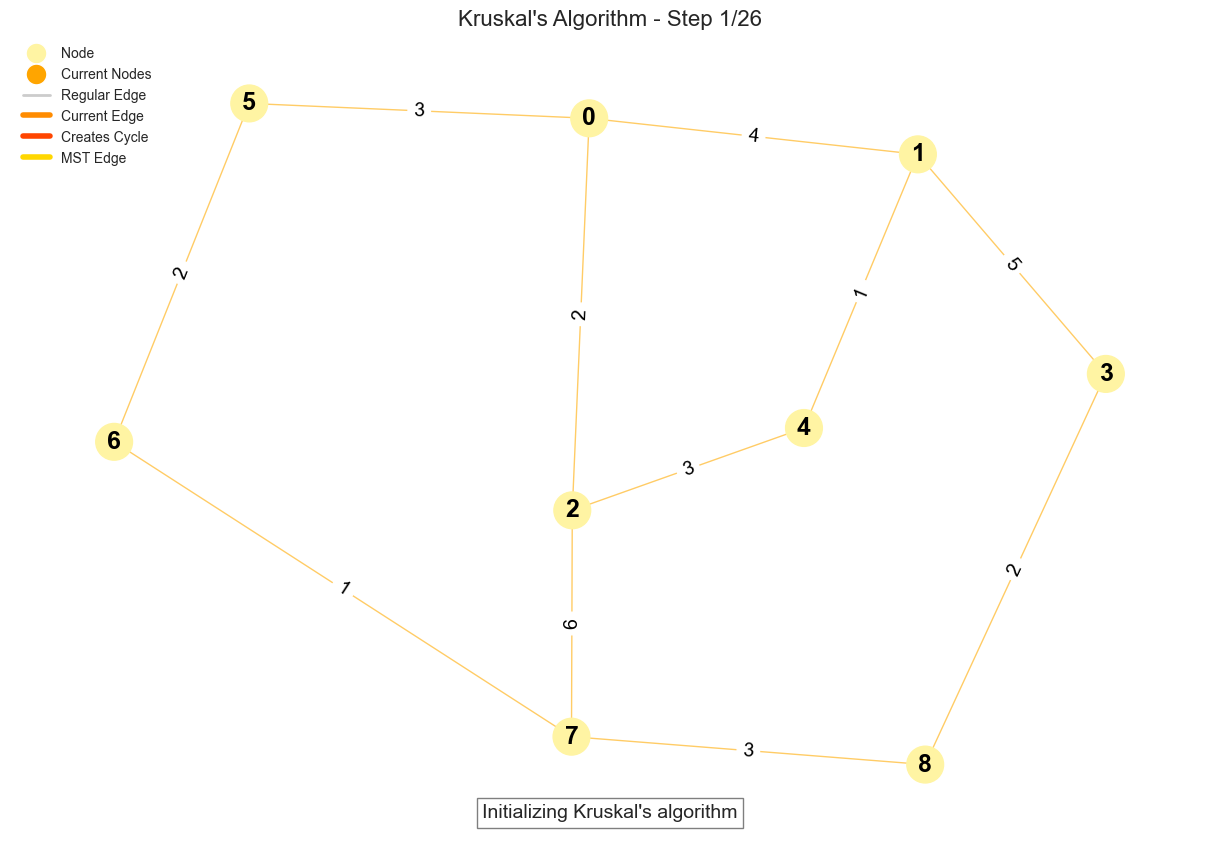

In [10]:
def kruskal_optimized_with_steps(graph):
    """
    Kruskal's algorithm implementation that records steps for visualization.
    
    Args:
        graph: Dictionary representation of graph
        
    Returns:
        List of steps for visualization
    """
    edges = []
    for node in graph:
        for neighbor, weight in graph[node].items():
            if node < neighbor:  # Avoid duplicate edges
                edges.append((weight, node, neighbor))

    steps = []

    # Initial state
    steps.append({
        'event': 'initialize',
        'description': 'Initializing Kruskal\'s algorithm',
        'parent': None,
        'rank': None,
        'mst': [],
        'current_edge': None,
        'all_edges': edges.copy(),
        'unsorted': True
    })

    # Sort edges
    edges.sort()

    steps.append({
        'event': 'sort_edges',
        'description': 'Sorting all edges by weight',
        'parent': None,
        'rank': None,
        'mst': [],
        'current_edge': None,
        'all_edges': edges.copy()
    })

    # Initialize Union-Find
    parent = {node: node for node in graph}
    rank = {node: 0 for node in graph}

    steps.append({
        'event': 'init_union_find',
        'description': 'Initializing Union-Find data structure',
        'parent': parent.copy(),
        'rank': rank.copy(),
        'mst': [],
        'current_edge': None,
        'all_edges': edges.copy()
    })

    mst = []

    for weight, node1, node2 in edges:
        current_edge = (node1, node2, weight)

        steps.append({
            'event': 'check_edge',
            'description': f'Checking edge {node1}→{node2} (weight: {weight})',
            'parent': parent.copy(),
            'rank': rank.copy(),
            'mst': mst.copy(),
            'current_edge': current_edge,
            'all_edges': edges.copy()
        })

        root1 = find_optimized(parent, node1)
        root2 = find_optimized(parent, node2)

        if root1 != root2:
            old_parent = parent.copy()
            old_rank = rank.copy()

            union_optimized(parent, rank, node1, node2)

            mst.append((node1, node2, weight))

            steps.append({
                'event': 'add_to_mst',
                'description': f'Adding edge {node1}→{node2} (weight: {weight}) to MST',
                'old_parent': old_parent,
                'old_rank': old_rank,
                'parent': parent.copy(),
                'rank': rank.copy(),
                'mst': mst.copy(),
                'current_edge': current_edge,
                'all_edges': edges.copy()
            })
        else:
            steps.append({
                'event': 'skip_edge',
                'description': f'Skipping edge {node1}→{node2} - would create a cycle',
                'parent': parent.copy(),
                'rank': rank.copy(),
                'mst': mst.copy(),
                'current_edge': current_edge,
                'all_edges': edges.copy()
            })

    # Final state
    steps.append({
        'event': 'complete',
        'description': 'Kruskal\'s algorithm complete',
        'parent': parent.copy(),
        'rank': rank.copy(),
        'mst': mst.copy(),
        'current_edge': None,
        'all_edges': edges.copy()
    })

    return steps

# Create a NetworkX graph for Kruskal's algorithm
G_kruskal = nx.Graph()
for node, neighbors in visualization_graph.items():
    for neighbor, weight in neighbors.items():
        if node < neighbor:  # Avoid duplicate edges
            G_kruskal.add_edge(node, neighbor, weight=weight)

# Get the steps
kruskal_steps = kruskal_optimized_with_steps(visualization_graph)

# Helper function to get connected components
def get_connected_components(parent):
    components = {}
    parent_copy = parent.copy()
    
    for node in parent_copy:
        root = find_optimized(parent_copy, node)
        
        if root not in components:
            components[root] = []
        components[root].append(node)
    
    return components

# Visualization function
def update_kruskal(frame):
    plt.clf()
    step = kruskal_steps[frame]
    event = step['event']
    
    # Fixed layout for consistent visualization
    pos = nx.spring_layout(G_kruskal, seed=42)
    
    # Color nodes
    node_color_map = [yellow_colors['node_default'] for _ in G_kruskal.nodes()]
    
    if step['current_edge']:
        node1, node2, _ = step['current_edge']
        for i, node in enumerate(G_kruskal.nodes()):
            if node == node1 or node == node2:
                node_color_map[i] = yellow_colors['node_current']
    
    # Color edges
    edge_color_map = []
    edge_width_map = []
    
    for u, v in G_kruskal.edges():
        edge = 'default'
        
        for n1, n2, _ in step.get('mst', []):
            if (u == n1 and v == n2) or (u == n2 and v == n1):
                edge = 'mst'
                break
        
        if step['current_edge']:
            n1, n2, _ = step['current_edge']
            if (u == n1 and v == n2) or (u == n2 and v == n1):
                if event == 'skip_edge':
                    edge = 'rejected'
                else:
                    edge = 'current'
        
        if event == 'initialize' and step.get('unsorted', False):
            for weight, n1, n2 in step['all_edges']:
                if (u == n1 and v == n2) or (u == n2 and v == n1):
                    edge = 'unsorted'
                    break
        
        edge_color_map.append(edge_colors[edge if edge in edge_colors else 'default'])
        edge_width_map.append(4 if edge in ['mst', 'current', 'rejected'] else 1)
    
    # Draw graph
    nx.draw(G_kruskal, pos, with_labels=True, node_color=node_color_map,
            edge_color=edge_color_map, width=edge_width_map,
            node_size=700, font_size=18, font_weight='bold')
    
    # Add edge labels
    edge_labels = nx.get_edge_attributes(G_kruskal, 'weight')
    nx.draw_networkx_edge_labels(G_kruskal, pos, edge_labels=edge_labels, font_size=14)
    
    plt.title(f"Kruskal's Algorithm - Step {frame+1}/{len(kruskal_steps)}", fontsize=16)
    
    # Add description
    plt.figtext(0.5, 0.02, step['description'],
                ha="center", fontsize=14, bbox={"facecolor": "white", "alpha": 0.5})
    
    # Display connected components
    if step['parent']:
        try:
            components = get_connected_components(step['parent'])
            forest_text = "Connected Components: "
            component_strs = []
            
            for root, members in components.items():
                component_strs.append("[" + ", ".join(sorted(members)) + "]")
            
            forest_text += ", ".join(component_strs[:3])
            if len(component_strs) > 3:
                forest_text += f" + {len(component_strs) - 3} more"
            
            plt.figtext(0.5, 0.06, forest_text,
                        ha="center", fontsize=12, bbox={"facecolor": "white", "alpha": 0.5})
        except Exception as e:
            plt.figtext(0.5, 0.06, "Union-Find structure initialized",
                        ha="center", fontsize=12, bbox={"facecolor": "white", "alpha": 0.5})
    
    # Add MST weight info
    if step['mst']:
        total_weight = sum(weight for _, _, weight in step['mst'])
        plt.figtext(0.85, 0.95, f"MST Weight: {total_weight}",
                    ha="center", fontsize=14, bbox={"facecolor": yellow_colors['node_default'], "alpha": 0.7})
    
    # Add legend
    legend_elements = [
        plt.Line2D([0], [0], marker='o', color='w', markerfacecolor=yellow_colors['node_default'], markersize=15, label='Node'),
        plt.Line2D([0], [0], marker='o', color='w', markerfacecolor=yellow_colors['node_current'], markersize=15, label='Current Nodes'),
        plt.Line2D([0], [0], color=yellow_colors['edge_default'], lw=2, label='Regular Edge'),
        plt.Line2D([0], [0], color=yellow_colors['edge_current'], lw=4, label='Current Edge'),
        plt.Line2D([0], [0], color=yellow_colors['edge_rejected'], lw=4, label='Creates Cycle'),
        plt.Line2D([0], [0], color=yellow_colors['edge_mst'], lw=4, label='MST Edge')
    ]
    
    plt.legend(handles=legend_elements, loc='upper left')

# Create Kruskal's animation
fig_kruskal = plt.figure(figsize=(12, 8))
ani_kruskal = FuncAnimation(fig_kruskal, update_kruskal, frames=len(kruskal_steps), interval=1500, repeat=True)




